In [13]:
%run helper.ipynb

# Data Load and cleaning

## Data Loading

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

In [15]:
df_raw = pd.read_csv('data/LengthOfStay.csv')

df_raw.head(3)

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3


In [16]:
print( f'The data has rows => {df_raw.shape[0]} and columns => {df_raw.shape[1]}')

The data has rows => 100000 and columns => 28


## Check for missing values

In [17]:
print('missing values')
for column in df_raw.columns:
    missing_count = df_raw[column].isna().sum()
    print(f'{column} {"-"* (30 - len(column))}> {missing_count}')

missing values
eid ---------------------------> 0
vdate -------------------------> 0
rcount ------------------------> 0
gender ------------------------> 0
dialysisrenalendstage ---------> 0
asthma ------------------------> 0
irondef -----------------------> 0
pneum -------------------------> 0
substancedependence -----------> 0
psychologicaldisordermajor ----> 0
depress -----------------------> 0
psychother --------------------> 0
fibrosisandother --------------> 0
malnutrition ------------------> 0
hemo --------------------------> 0
hematocrit --------------------> 0
neutrophils -------------------> 0
sodium ------------------------> 0
glucose -----------------------> 0
bloodureanitro ----------------> 0
creatinine --------------------> 0
bmi ---------------------------> 0
pulse -------------------------> 0
respiration -------------------> 0
secondarydiagnosisnonicd9 -----> 0
discharged --------------------> 0
facid -------------------------> 0
lengthofstay ------------------> 0


Found no missing values ! 

## Data Types

**Hospital Admission Dataset Description**

| Index | Data Field                         | Type     | Description                                                             |
|-------|------------------------------------|----------|-------------------------------------------------------------------------|
| 1     | eid                                | Integer  | Unique Id of the hospital admission                                      |
| 2     | vdate                              | String   | Visit date                                                              |
| 3     | rcount                             | Integer  | Number of readmissions within last 180 days                              |
| 4     | gender                             | String   | Gender of the patient - M or F                                           |
| 5     | dialysisrenalendstage              | String   | Flag for renal disease during encounter                                  |
| 6     | asthma                             | String   | Flag for asthma during encounter                                         |
| 7     | irondef                            | String   | Flag for iron deficiency during encounter                                |
| 8     | pneum                              | String   | Flag for pneumonia during encounter                                      |
| 9     | substancedependence                | String   | Flag for substance dependence during encounter                           |
| 10    | psychologicaldisordermajor         | String   | Flag for major psychological disorder during encounter                   |
| 11    | depress                            | String   | Flag for depression during encounter                                     |
| 12    | psychother                         | String   | Flag for other psychological disorder during encounter                   |
| 13    | fibrosisandother                   | String   | Flag for fibrosis during encounter                                       |
| 14    | malnutrition                       | String   | Flag for malnutrition during encounter                                   |
| 15    | hemo                               | String   | Flag for blood disorder during encounter                                 |
| 16    | hematocrit                         | Float    | Average hematocrit value during encounter (g/dL)                         |
| 17    | neutrophils                        | Float    | Average neutrophils value during encounter (cells/microL)                |
| 18    | sodium                             | Float    | Average sodium value during encounter (mmol/L)                           |
| 19    | glucose                            | Float    | Average glucose value during encounter (mmol/L)                          |
| 20    | bloodureanitro                     | Float    | Average blood urea nitrogen value during encounter (mg/dL)               |
| 21    | creatinine                         | Float    | Average creatinine value during encounter (mg/dL)                        |
| 22    | bmi                                | Float    | Average BMI during encounter (kg/m²)                                     |
| 23    | pulse                              | Float    | Average pulse during encounter (beats/m)                                 |
| 24    | respiration                        | Float    | Average respiration during encounter (breaths/m)                         |
| 25    | secondarydiagnosisnonicd9          | Integer  | Flag for whether a non ICD 9 formatted diagnosis was coded as secondary  |
| 26    | discharged                         | String   | Date of discharge                                                        |
| 27    | facid                              | Integer  | Facility ID at which the encounter occurred                              |
| 28    | lengthofstay                       | Integer  | Length of stay for the encounter                                         |


In [18]:
print('-'*40)
print('Let us look at the columns dtypes ')
print('-'*40)

df_raw.info()

----------------------------------------
Let us look at the columns dtypes 
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother    

In [19]:
print('-'*40)
print('Let us sample the contents ')
print('-'*40)

df_raw.sample(5).T

----------------------------------------
Let us sample the contents 
----------------------------------------


,43341,7584,53023,10224,97297
eid,43342,7585,53024,10225,97298
vdate,1/28/2012,11/6/2012,2/2/2012,7/11/2012,2/21/2012
rcount,4,0,0,0,0
gender,F,F,F,F,F
dialysisrenalendstage,0,0,0,0,0
asthma,0,0,0,0,0
irondef,0,0,1,0,0
pneum,0,0,0,0,0
substancedependence,0,0,0,0,0
psychologicaldisordermajor,0,0,0,1,0


In [20]:
df_cleaned = df_raw.copy()

### Categorical data encoding

In [21]:
# Lets start by checking the columns that are categorical in nature
print(f"These columns are categorical : {df_raw.select_dtypes(include=['object']).columns}")

These columns are categorical : Index(['vdate', 'rcount', 'gender', 'discharged', 'facid'], dtype='object')


In [22]:
for col in ['vdate', 'rcount', 'gender', 'discharged', 'facid']:
    print(f'-----{col}----')
    print(f'{col} has {len(df_raw[col].unique())} unique values')
    if len(df_raw[col].unique()) < 10:
        print (df_raw[col].unique())

-----vdate----
vdate has 367 unique values
-----rcount----
rcount has 6 unique values
['0' '5+' '1' '3' '4' '2']
-----gender----
gender has 2 unique values
['F' 'M']
-----discharged----
discharged has 378 unique values
-----facid----
facid has 5 unique values
['B' 'A' 'E' 'D' 'C']


In [23]:
# These columns are encoded

In [25]:
# Create mappings for each categorical column
rcount_mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5+': 5}
gender_mapping = {'F': 0, 'M': 1}
facid_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

# Apply the mappings using map()
df_raw['rcount'] = df_raw['rcount'].map(rcount_mapping)
df_raw['gender'] = df_raw['gender'].map(gender_mapping)
df_raw['facid'] = df_raw['facid'].map(facid_mapping)

# Display the DataFrame with encoded values
print(df_raw[['rcount', 'gender', 'facid']])

       rcount  gender  facid
0           0       0      1
1           5       0      0
2           1       0      1
3           0       0      0
4           0       0      4
...       ...     ...    ...
99995       3       1      1
99996       0       1      1
99997       1       1      2
99998       0       1      1
99999       0       0      1

[100000 rows x 3 columns]


# Analytics

## Univariate Analytics

### Predictors dtype Assignment

In [43]:
# -- continious variables -- 

['eid', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9',
       'lengthofstay']

# -- id variables -- 
       
id_var = ['eid']

# -- continuous variables -- 

cont_var = ['hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9']

target_var = ['lengthofstay']

# -- binary variables -- 

# ['dialysisrenalendstage','asthma', 'irondef', 'pneum',
#        'substancedependence', 'psychologicaldisordermajor', 'depress',
#        'psychother', 'fibrosisandother', 'malnutrition', 'hemo']
       
binary_var = ['dialysisrenalendstage','asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo','rcount', 'gender','facid']

# -- datetime variables -- 
# ['vdate','discharged']

datetime_var = ['vdate','discharged']


### Histograms

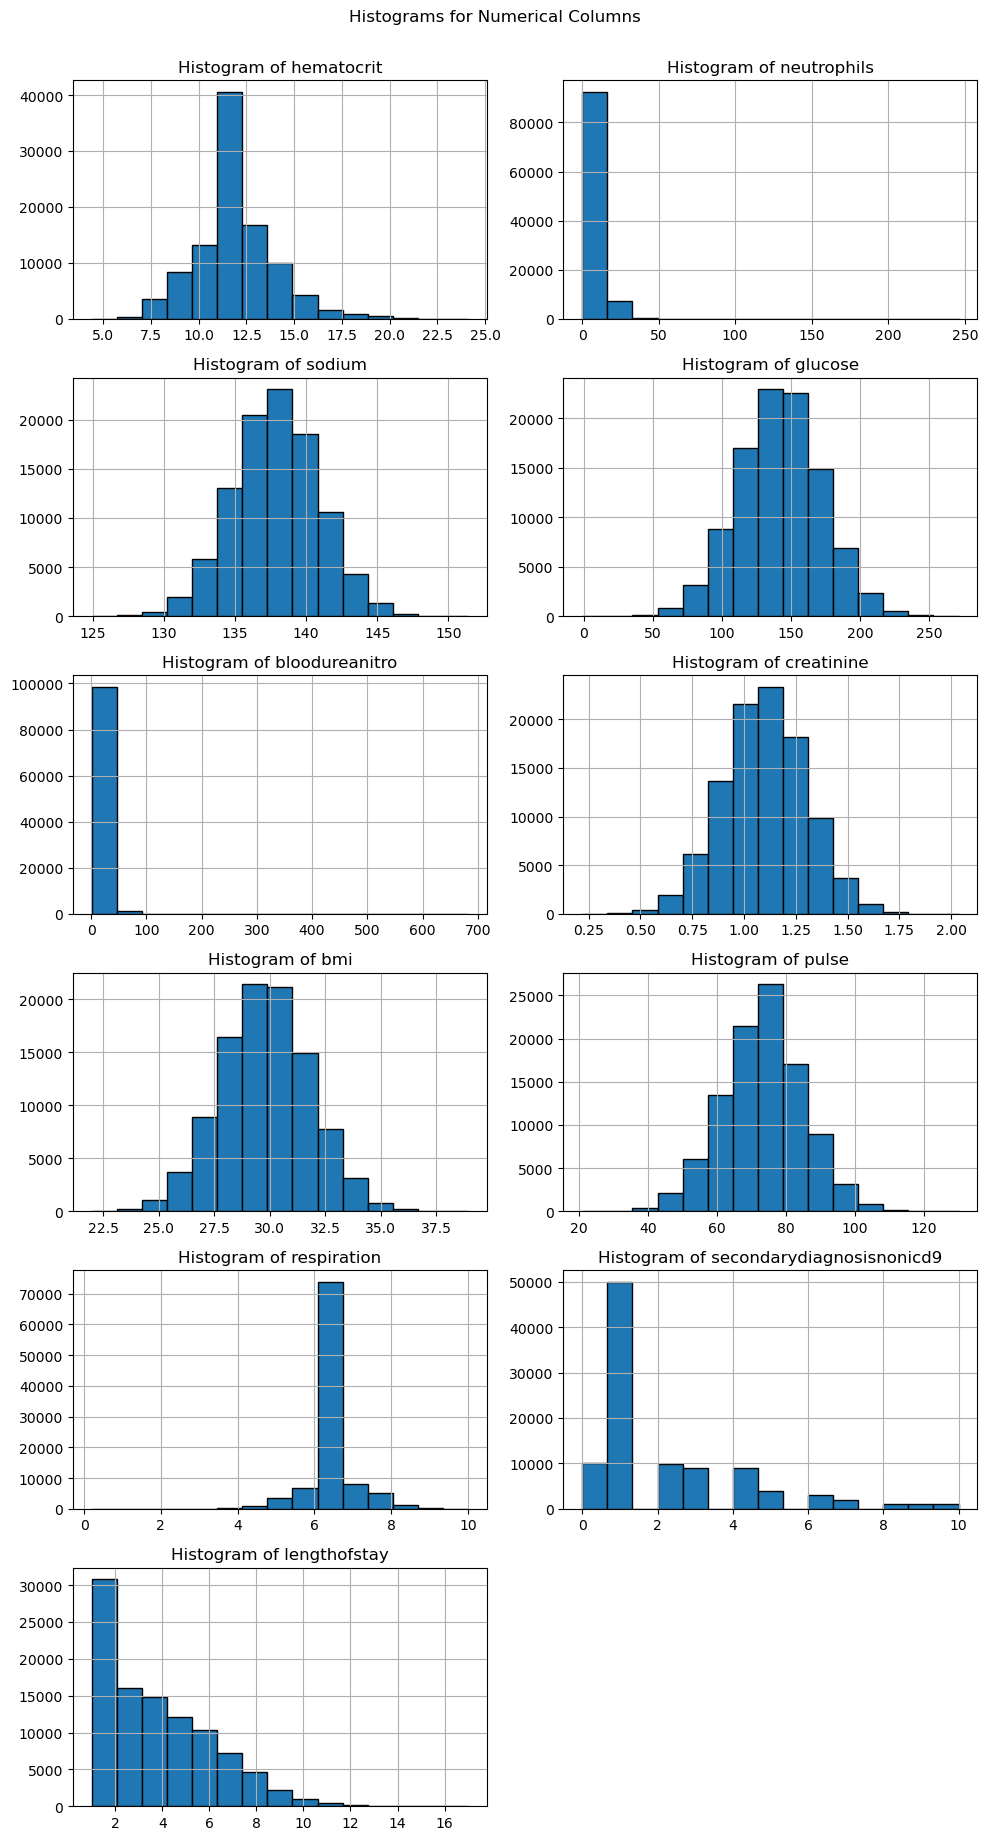

In [30]:
# Histogram for continuous variable
plot_histograms(df_raw[[ 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9',
       'lengthofstay']])

Observation:
1. The length of stay is skewed to the left
2. Histogram of Bloodureanitro and neutrophils have some outliers and may be good predictors

### Binary Variables

In [32]:
df_raw[['dialysisrenalendstage','asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo','lengthofstay']].head(3)

,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,lengthofstay
0,0,0,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,0,3


In [31]:
print('percentage of positive cases in each category')

df_raw[['dialysisrenalendstage','asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo']].mean() * 100

percentage of positive cases in each category


dialysisrenalendstage          3.642
asthma                         3.527
irondef                        9.494
pneum                          3.945
substancedependence            6.306
psychologicaldisordermajor    23.904
depress                        5.166
psychother                     4.939
fibrosisandother               0.479
malnutrition                   4.948
hemo                           8.000
dtype: float64

Notice that .... 
1. Apart from 'psychologicaldisordermajor' all are below 10 percent
2. Also 'fibrosisandother' has small percentage of positive and it is possible that the model will have to handle this seperatly.

## Correlation and Assosiations

/Users/craigalbuquerque/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


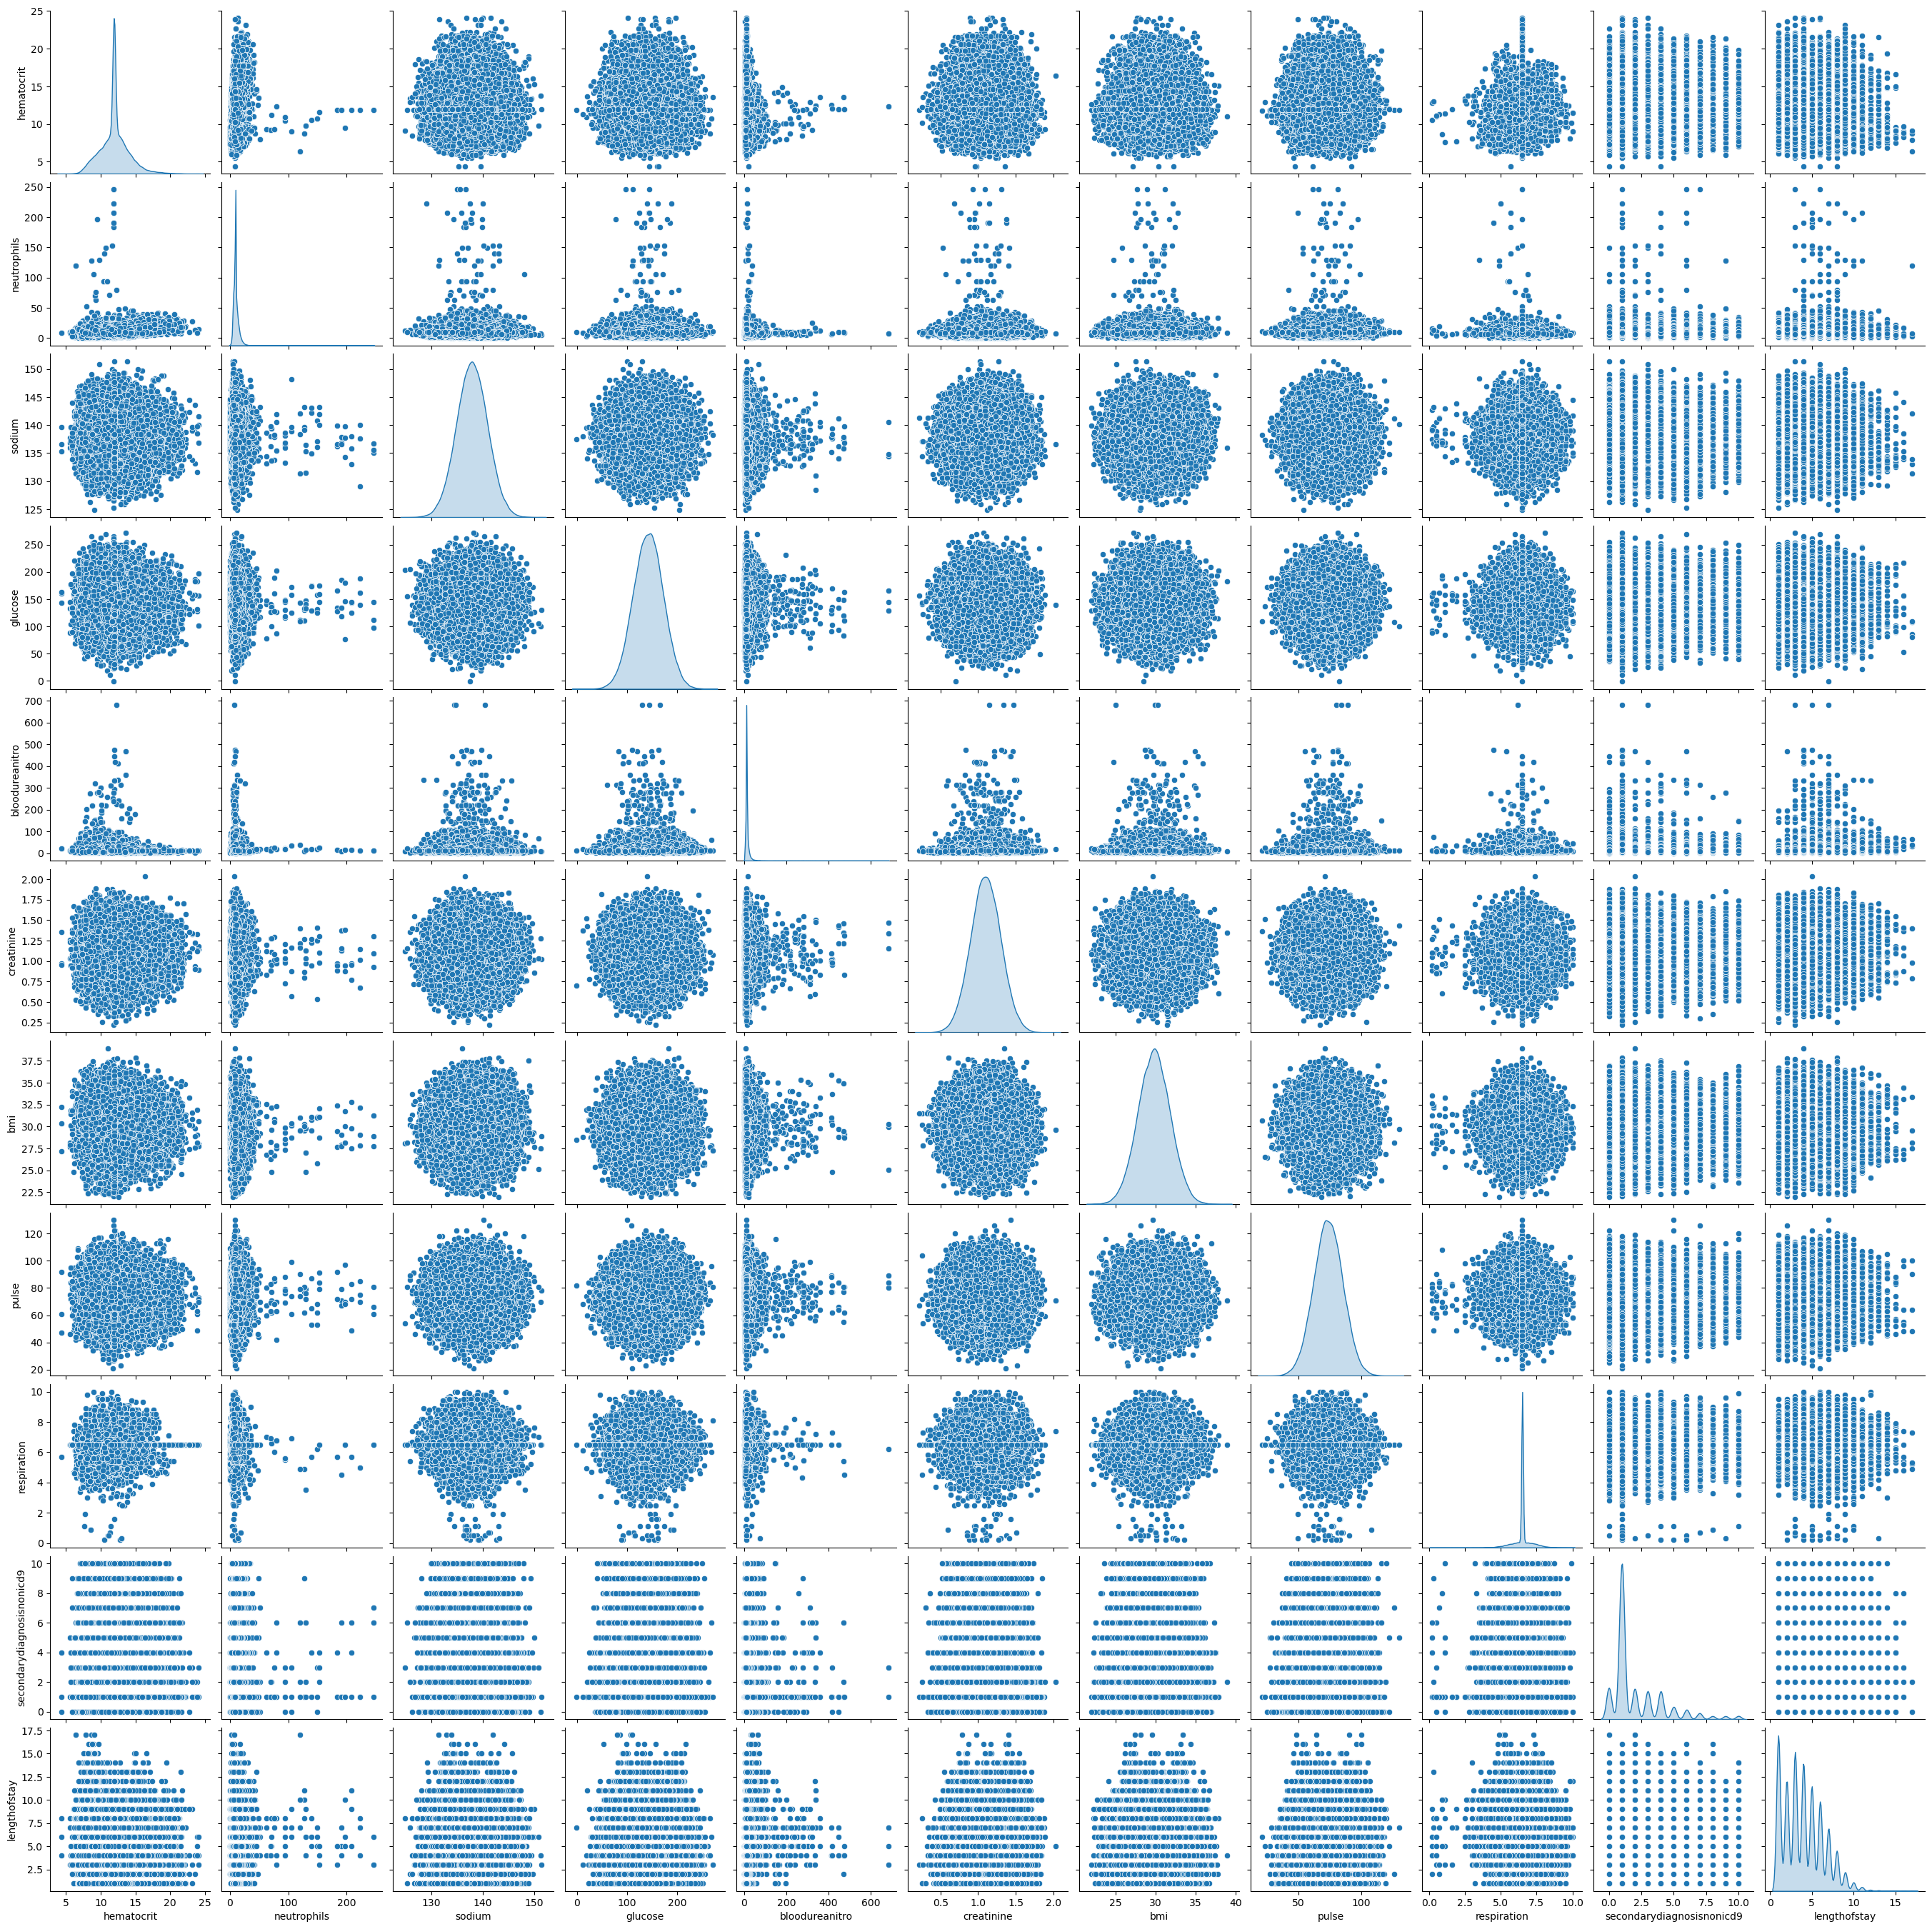

In [35]:
# Generate pair plot
sns.pairplot(df_raw[cont_var + target_var], diag_kind="kde")

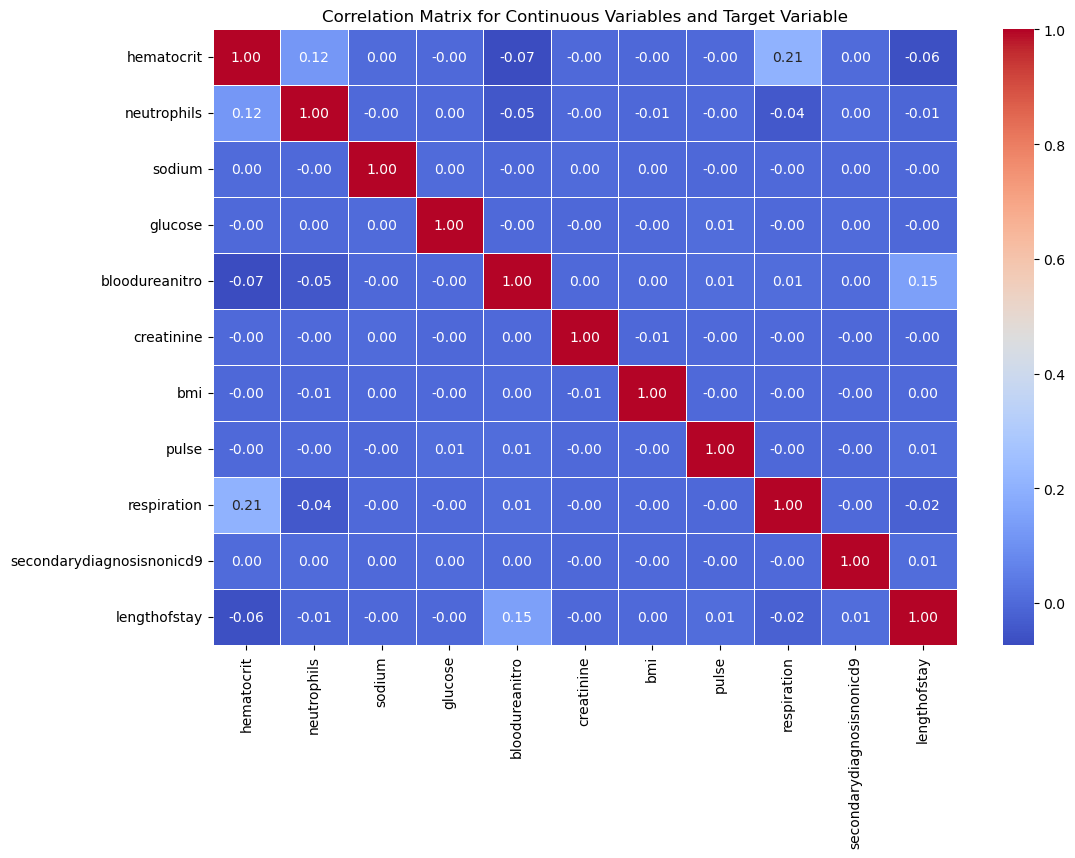

In [36]:
# Calculate the correlation matrix


corr_matrix = df_raw[cont_var + target_var].corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Continuous Variables and Target Variable")
plt.show()

In [45]:
# Use Chi-Square Test to check for assosiation between categorical variables and target variable
# p-value less than 0.05 suggests that the two variables are dependent (there is an association). A p-value greater than 0.05 suggests independence.


for col in binary_var:
    chi_square_test(df_raw, col , 'lengthofstay')

Chi-Square Test between dialysisrenalendstage and lengthofstay:
Chi2 Statistic: 3325.6390479200595
P-value: 0.0 - (significantthere is an association) 

Chi-Square Test between asthma and lengthofstay:
Chi2 Statistic: 1721.3439059574775
P-value: 0.0 - (significantthere is an association) 

Chi-Square Test between irondef and lengthofstay:
Chi2 Statistic: 5202.100805327484
P-value: 0.0 - (significantthere is an association) 

Chi-Square Test between pneum and lengthofstay:
Chi2 Statistic: 2329.3585322432336
P-value: 0.0 - (significantthere is an association) 

Chi-Square Test between substancedependence and lengthofstay:
Chi2 Statistic: 3280.3244032045295
P-value: 0.0 - (significantthere is an association) 

Chi-Square Test between psychologicaldisordermajor and lengthofstay:
Chi2 Statistic: 14471.64750381232
P-value: 0.0 - (significantthere is an association) 

Chi-Square Test between depress and lengthofstay:
Chi2 Statistic: 2539.6424313653642
P-value: 0.0 - (significantthere is an as

### 📊 Observation:
<span style="color:blue">Overall, I do not see correlation between the `cont_var` and the target_var;</span>  
<span style="color:blue">however, there is a strong correlation between the `binary_var` and the `target_var`.</span>  
<span style="color:blue">I will start building a model to check if my observations still hold good.</span>  



## Feature Engineering

In [ ]:
df_cleaned

In [ ]:
# Initial Model build

In [46]:
# Conver to datetime
df_raw['vdate'] = pd.to_datetime(df_raw['vdate'])
df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])

In [47]:
# Feature Importance

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

df_model = df_raw.drop(['eid', 'vdate', 'discharged'], axis=1)

# Feature columns
X = df_model.drop('lengthofstay', axis=1)

# Target column
y = df_model['lengthofstay']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importance_df)

Mean Squared Error: 0.7202090883060489
R-Squared: 0.8687473461641403
Feature Importances:
                        Feature  Importance
0                       rcount    0.643110
23                       facid    0.171465
13                  hematocrit    0.045356
21                 respiration    0.025172
12                        hemo    0.024150
17              bloodureanitro    0.016235
19                         bmi    0.012270
18                  creatinine    0.012216
15                      sodium    0.011148
16                     glucose    0.011114
20                       pulse    0.010144
14                 neutrophils    0.007116
7   psychologicaldisordermajor    0.005152
2        dialysisrenalendstage    0.003712
22   secondarydiagnosisnonicd9    0.000477
4                      irondef    0.000272
5                        pneum    0.000163
1                       gender    0.000151
6          substancedependence    0.000144
11                malnutrition    0.000128
8     

In [ ]:
features_low_importance = [
    'psychologicaldisordermajor',
    'dialysisrenalendstage',
    'secondarydiagnosisnonicd9',
    'irondef',
    'pneum',
    'gender',
    'substancedependence',
    'malnutrition',
    'depress',
    'psychother',
    'asthma',
    'fibrosisandother'
]

In [60]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Round the predicted values to the nearest whole number
y_pred_rounded = np.round(y_pred)

# Ensure both y_pred_rounded and y_test are of integer type
y_pred_rounded = y_pred_rounded.astype(int)
y_test = y_test.astype(int)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)

# Print classification metrics
print(f"Classification Accuracy: {accuracy}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rounded))


Classification Accuracy: 0.5337

Classification Report:

              precision    recall  f1-score   support

           1       0.59      0.96      0.73      3563
           2       0.56      0.38      0.46      2552
           3       0.51      0.63      0.57      3225
           4       0.53      0.45      0.48      3027
           5       0.51      0.44      0.47      2442
           6       0.47      0.44      0.45      2014
           7       0.54      0.46      0.50      1498
           8       0.40      0.29      0.34       915
           9       0.13      0.01      0.03       431
          10       0.33      0.01      0.02       200
          11       0.00      0.00      0.00        89
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1

    accuracy           

/Users/craigalbuquerque/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/craigalbuquerque/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/craigalbuquerque/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [ ]:
# Classification model

In [50]:
# Iteration 1

In [58]:
training = False

In [59]:
if training == True:
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.preprocessing import LabelEncoder

    # Assuming df_model has been cleaned and preprocessed
    df_model = df_raw.drop(['eid', 'vdate', 'discharged'], axis=1)

    # Feature columns
    X = df_model.drop('lengthofstay', axis=1)

    # Target column (length of stay as a classification problem)
    y = df_model['lengthofstay']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classification Accuracy: {accuracy}")

    # Detailed classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
else:
    pass

Classification Accuracy: 0.5337

Classification Report:

              precision    recall  f1-score   support

           1       0.59      0.96      0.73      3563
           2       0.56      0.38      0.46      2552
           3       0.51      0.63      0.57      3225
           4       0.53      0.45      0.48      3027
           5       0.51      0.44      0.47      2442
           6       0.47      0.44      0.45      2014
           7       0.54      0.46      0.50      1498
           8       0.40      0.29      0.34       915
           9       0.13      0.01      0.03       431
          10       0.33      0.01      0.02       200
          11       0.00      0.00      0.00        89
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1

    accuracy           

/Users/craigalbuquerque/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/craigalbuquerque/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/craigalbuquerque/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [55]:
# Iteration 2: Random Forest with grid search to find the best parameters

In [56]:
training = False


if training == True:
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report

    # Assuming df_model has been cleaned and preprocessed
    df_model = df_raw.drop(['eid', 'vdate', 'discharged'], axis=1)

    # Feature columns
    X = df_model.drop('lengthofstay', axis=1)

    # Target column (length of stay as a classification problem)
    y = df_model['lengthofstay']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestClassifier with class_weight='balanced'
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

    # Use StratifiedKFold for cross-validation to maintain class distribution
    skf = StratifiedKFold(n_splits=3)

    # Hyperparameter tuning using GridSearchCV with StratifiedKFold
    param_grid = {
        'n_estimators': [400,500,600,1000],
        'max_depth': [10, 20, 30],
        'min_samples_split': [20,30,40,50],
        'min_samples_leaf': [4, 68]
    }

    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2, error_score='raise')
    grid_search.fit(X_train, y_train)

    # Best parameters from GridSearch
    print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

    # Train the classifier with the best parameters
    best_rf_classifier = grid_search.best_estimator_

    # Predictions on the test set
    y_pred = best_rf_classifier.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classification Accuracy: {accuracy}")

    # Detailed classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

else:
    pass


In [ ]:
# Searching for the ideal number of training instances

n_estimators: 1, Training Accuracy: 0.57835, Test Accuracy: 0.5074
n_estimators: 2, Training Accuracy: 0.63885, Test Accuracy: 0.54705
n_estimators: 3, Training Accuracy: 0.6702, Test Accuracy: 0.5612
n_estimators: 4, Training Accuracy: 0.6914125, Test Accuracy: 0.5798
n_estimators: 5, Training Accuracy: 0.7070875, Test Accuracy: 0.5866
n_estimators: 6, Training Accuracy: 0.716575, Test Accuracy: 0.5929
n_estimators: 7, Training Accuracy: 0.723925, Test Accuracy: 0.59705
n_estimators: 8, Training Accuracy: 0.7298625, Test Accuracy: 0.5999
n_estimators: 9, Training Accuracy: 0.7346375, Test Accuracy: 0.60275
n_estimators: 10, Training Accuracy: 0.7352625, Test Accuracy: 0.60265
n_estimators: 11, Training Accuracy: 0.737775, Test Accuracy: 0.60195
n_estimators: 12, Training Accuracy: 0.7405625, Test Accuracy: 0.60225
n_estimators: 13, Training Accuracy: 0.7434875, Test Accuracy: 0.5999
n_estimators: 14, Training Accuracy: 0.747, Test Accuracy: 0.60175
n_estimators: 15, Training Accuracy:

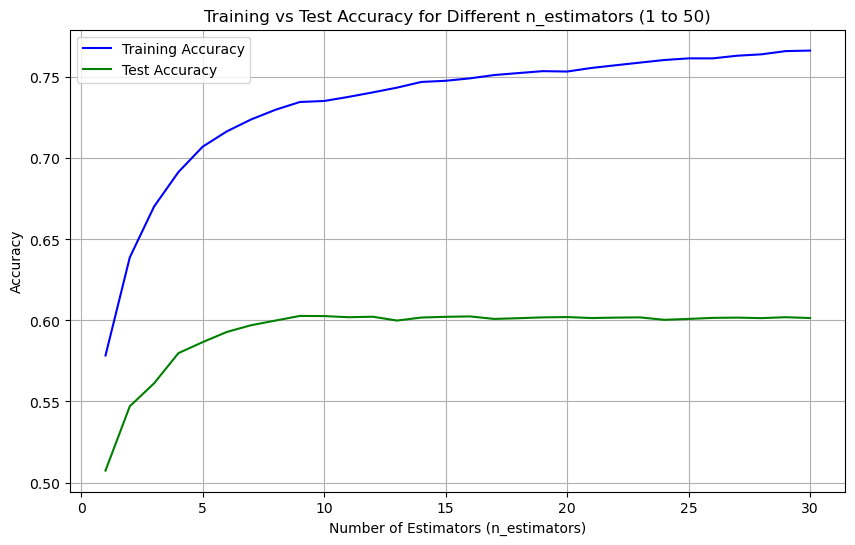

In [65]:
# Searching for the ideal number of training instances

import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier with warm_start=True
rf_model = RandomForestClassifier(max_depth=25, min_samples_leaf=8, min_samples_split=20, 
                                  warm_start=True, random_state=42)

# Define the range of n_estimators to iterate over, starting from 1 to 50
n_estimators_range = list(range(1, 31))  # Increment from 1 to 50

train_accuracies = []
test_accuracies = []

# Loop over different values of n_estimators
for n_estimators in n_estimators_range:
    # Set the current number of estimators and fit the model
    rf_model.set_params(n_estimators=n_estimators)
    rf_model.fit(X_train, y_train)

    # Predict on the training and test sets
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print progress
    print(f"n_estimators: {n_estimators}, Training Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label="Training Accuracy", color="blue")
plt.plot(n_estimators_range, test_accuracies, label="Test Accuracy", color="green")
plt.title("Training vs Test Accuracy for Different n_estimators (1 to 50)")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
#Training with best parameters and optimal training instances.

In [ ]:
#Training with best parameters and optimal training instances.

training = True
if training == True:
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.preprocessing import LabelEncoder

    # Assuming df_model has been cleaned and preprocessed
    df_model = df_raw.drop(['eid', 'vdate', 'discharged'], axis=1)

    # Feature columns
    X = df_model.drop('lengthofstay', axis=1)

    # Target column (length of stay as a classification problem)
    y = df_model['lengthofstay']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    # Initialize RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=25, min_samples_leaf=8, min_samples_split=20, 
                                  warm_start=True, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classification Accuracy: {accuracy}")

    # Detailed classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
else:
    pass

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(max_depth=1, min_samples_leaf=8, min_samples_split=20, learning_rate=0.1,max_features = 3,
                                      random_state=42)

# Define the range of n_estimators to iterate over, starting from 1 to 50
n_estimators_range = list(range(500, 5001, 500))

train_accuracies = []
test_accuracies = []

# Loop over different values of n_estimators
for n_estimators in n_estimators_range:
    # Set the current number of estimators and fit the model
    gb_model.set_params(n_estimators=n_estimators)
    gb_model.fit(X_train, y_train)

    # Predict on the training and test sets
    y_train_pred = gb_model.predict(X_train)
    y_test_pred = gb_model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print progress
    print(f"n_estimators: {n_estimators}, Training Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label="Training Accuracy", color="blue")
plt.plot(n_estimators_range, test_accuracies, label="Test Accuracy", color="green")
plt.title("Training vs Test Accuracy for Gradient Boosting (1 to 30 estimators)")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


n_estimators: 500, Training Accuracy: 0.4828375, Test Accuracy: 0.4779
n_estimators: 1000, Training Accuracy: 0.5127625, Test Accuracy: 0.50395
n_estimators: 1500, Training Accuracy: 0.540275, Test Accuracy: 0.5283
n_estimators: 2000, Training Accuracy: 0.557475, Test Accuracy: 0.54105
n_estimators: 2500, Training Accuracy: 0.5752375, Test Accuracy: 0.5567
n_estimators: 3000, Training Accuracy: 0.5852375, Test Accuracy: 0.5672
